In [119]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

# Data Exploration

In [121]:
data = pd.read_csv('heart_attack_prediction_dataset.csv')

In [122]:
data.head()

,Patient ID,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,Exercise Hours Per Week,Diet,Previous Heart Problems,Medication Use,Stress Level,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk
0,BMW7812,67,Male,208,158/88,72,0,0,1,0,0,4.168189,Average,0,0,9,6.615001,261404,31.251233,286,0,6,Argentina,South America,Southern Hemisphere,0
1,CZE1114,21,Male,389,165/93,98,1,1,1,1,1,1.813242,Unhealthy,1,0,1,4.963459,285768,27.194973,235,1,7,Canada,North America,Northern Hemisphere,0
2,BNI9906,21,Female,324,174/99,72,1,0,0,0,0,2.078353,Healthy,1,1,9,9.463426,235282,28.176571,587,4,4,France,Europe,Northern Hemisphere,0
3,JLN3497,84,Male,383,163/100,73,1,1,1,0,1,9.828130,Average,1,0,9,7.648981,125640,36.464704,378,3,4,Canada,North America,Northern Hemisphere,0
4,GFO8847,66,Male,318,91/88,93,1,1,1,1,0,5.804299,Unhealthy,1,0,6,1.514821,160555,21.809144,231,1,5,Thailand,Asia,Northern Hemisphere,0


In [123]:
data.describe()

,Age,Cholesterol,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,Exercise Hours Per Week,Previous Heart Problems,Medication Use,Stress Level,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Heart Attack Risk
count,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000
mean,53.707977,259.877211,75.021682,0.652288,0.492982,0.896839,0.501426,0.598083,10.014284,0.495835,0.498345,5.469702,5.993690,158263.181901,28.891446,417.677051,3.489672,7.023508,0.358211
std,21.249509,80.863276,20.550948,0.476271,0.499979,0.304186,0.500026,0.490313,5.783745,0.500011,0.500026,2.859622,3.466359,80575.190806,6.319181,223.748137,2.282687,1.988473,0.479502
min,18.000000,120.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.002442,0.000000,0.000000,1.000000,0.001263,20062.000000,18.002337,30.000000,0.000000,4.000000,0.000000
25%,35.000000,192.000000,57.000000,0.000000,0.000000,1.000000,0.000000,0.000000,4.981579,0.000000,0.000000,3.000000,2.998794,88310.000000,23.422985,225.500000,2.000000,5.000000,0.000000
50%,54.000000,259.000000,75.000000,1.000000,0.000000,1.000000,1.000000,1.000000,10.069559,0.000000,0.000000,5.000000,5.933622,157866.000000,28.768999,417.000000,3.000000,7.000000,0.000000
75%,72.000000,330.000000,93.000000,1.000000,1.000000,1.000000,1.000000,1.000000,15.050018,1.000000,1.000000,8.000000,9.019124,227749.000000,34.324594,612.000000,5.000000,9.000000,1.000000
max,90.000000,400.000000,110.000000,1.000000,1.000000,1.000000,1.000000,1.000000,19.998709,1.000000,1.000000,10.000000,11.999313,299954.000000,39.997211,800.000000,7.000000,10.000000,1.000000


In [124]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 26 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Patient ID                       8763 non-null   object 
 1   Age                              8763 non-null   int64  
 2   Sex                              8763 non-null   object 
 3   Cholesterol                      8763 non-null   int64  
 4   Blood Pressure                   8763 non-null   object 
 5   Heart Rate                       8763 non-null   int64  
 6   Diabetes                         8763 non-null   int64  
 7   Family History                   8763 non-null   int64  
 8   Smoking                          8763 non-null   int64  
 9   Obesity                          8763 non-null   int64  
 10  Alcohol Consumption              8763 non-null   int64  
 11  Exercise Hours Per Week          8763 non-null   float64
 12  Diet                

In [125]:
data.isnull().sum()

Patient ID             0
Age                    0
Sex                    0
Cholesterol            0
Blood Pressure         0
                      ..
Sleep Hours Per Day    0
Country                0
Continent              0
Hemisphere             0
Heart Attack Risk      0
Length: 26, dtype: int64

In [126]:
for col in data.columns:
    unique_count = data[col].nunique()
    print(f"{col} unique value count: {unique_count}")

Patient ID unique value count: 8763
Age unique value count: 73
Sex unique value count: 2
Cholesterol unique value count: 281
Blood Pressure unique value count: 3915
Heart Rate unique value count: 71
Diabetes unique value count: 2
Family History unique value count: 2
Smoking unique value count: 2
Obesity unique value count: 2
Alcohol Consumption unique value count: 2
Exercise Hours Per Week unique value count: 8763
Diet unique value count: 3
Previous Heart Problems unique value count: 2
Medication Use unique value count: 2
Stress Level unique value count: 10
Sedentary Hours Per Day unique value count: 8763
Income unique value count: 8615
BMI unique value count: 8763
Triglycerides unique value count: 771
Physical Activity Days Per Week unique value count: 8
Sleep Hours Per Day unique value count: 7
Country unique value count: 20
Continent unique value count: 6
Hemisphere unique value count: 2
Heart Attack Risk unique value count: 2


# Exploratory Data Analysis (EDA) 📊

In [127]:
data.columns

Index(['Patient ID', 'Age', 'Sex', 'Cholesterol', 'Blood Pressure',
       'Heart Rate', 'Diabetes', 'Family History', 'Smoking', 'Obesity',
       'Alcohol Consumption', 'Exercise Hours Per Week', 'Diet',
       'Previous Heart Problems', 'Medication Use', 'Stress Level',
       'Sedentary Hours Per Day', 'Income', 'BMI', 'Triglycerides',
       'Physical Activity Days Per Week', 'Sleep Hours Per Day', 'Country',
       'Continent', 'Hemisphere', 'Heart Attack Risk'],
      dtype='object')

In [128]:
data.drop("Patient ID", axis=1, inplace=True)

In [129]:
ctg_data = data[['Sex','Diet','Continent','Country','Hemisphere']]
ctg_data

,Sex,Diet,Continent,Country,Hemisphere
0,Male,Average,South America,Argentina,Southern Hemisphere
1,Male,Unhealthy,North America,Canada,Northern Hemisphere
2,Female,Healthy,Europe,France,Northern Hemisphere
3,Male,Average,North America,Canada,Northern Hemisphere
4,Male,Unhealthy,Asia,Thailand,Northern Hemisphere
...,...,...,...,...,...
8758,Male,Healthy,Asia,Thailand,Northern Hemisphere
8759,Female,Healthy,North America,Canada,Northern Hemisphere
8760,Male,Average,South America,Brazil,Southern Hemisphere
8761,Male,Unhealthy,South America,Brazil,Southern Hemisphere


In [130]:
c=data['Sex'].value_counts().reset_index(name="ctg_num")
c

,index,ctg_num
0,Male,6111
1,Female,2652


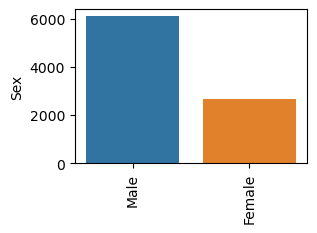

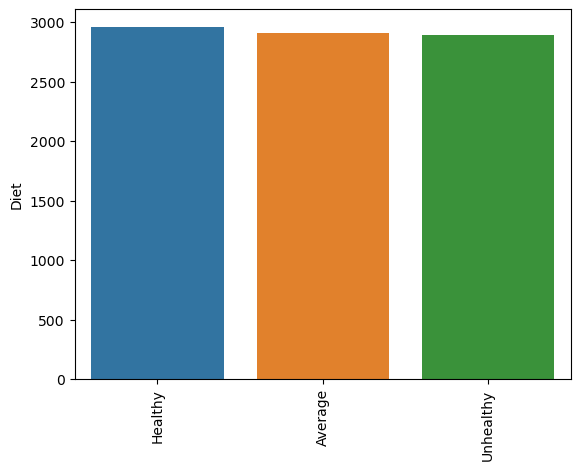

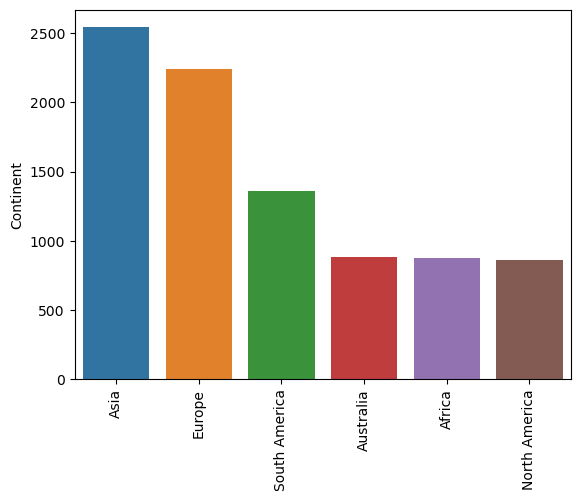

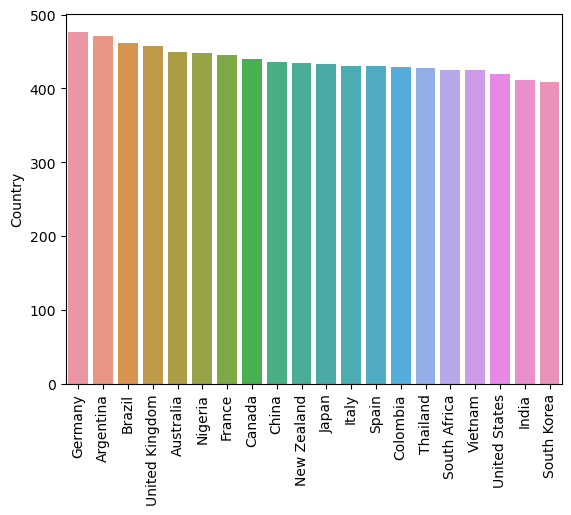

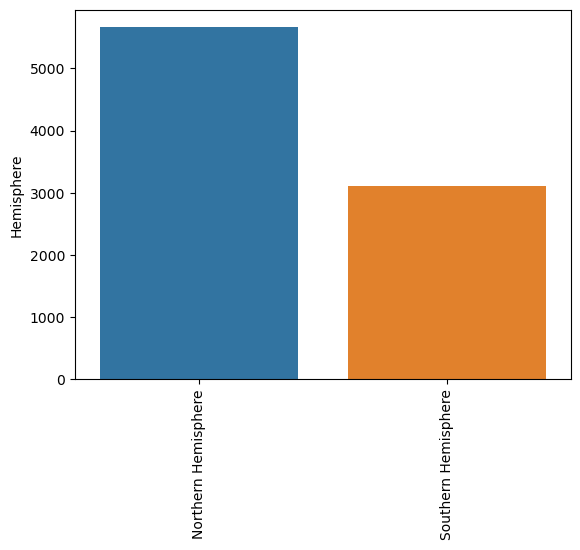

In [131]:
plt.figure(figsize=(3, 2))
for i in ctg_data.columns:
    ctg_num = ctg_data[i].value_counts()   
    chart = sns.barplot(x = ctg_num.index, y = ctg_num)
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90)    # label in vertical
    plt.show() 
    

# FEATURE ENGINEERING 🛠

In [132]:
data.head()

,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,Exercise Hours Per Week,Diet,Previous Heart Problems,Medication Use,Stress Level,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk
0,67,Male,208,158/88,72,0,0,1,0,0,4.168189,Average,0,0,9,6.615001,261404,31.251233,286,0,6,Argentina,South America,Southern Hemisphere,0
1,21,Male,389,165/93,98,1,1,1,1,1,1.813242,Unhealthy,1,0,1,4.963459,285768,27.194973,235,1,7,Canada,North America,Northern Hemisphere,0
2,21,Female,324,174/99,72,1,0,0,0,0,2.078353,Healthy,1,1,9,9.463426,235282,28.176571,587,4,4,France,Europe,Northern Hemisphere,0
3,84,Male,383,163/100,73,1,1,1,0,1,9.828130,Average,1,0,9,7.648981,125640,36.464704,378,3,4,Canada,North America,Northern Hemisphere,0
4,66,Male,318,91/88,93,1,1,1,1,0,5.804299,Unhealthy,1,0,6,1.514821,160555,21.809144,231,1,5,Thailand,Asia,Northern Hemisphere,0


In [133]:
numerical_columns = data._get_numeric_data().columns

In [134]:
data.columns

Index(['Age', 'Sex', 'Cholesterol', 'Blood Pressure', 'Heart Rate', 'Diabetes',
       'Family History', 'Smoking', 'Obesity', 'Alcohol Consumption',
       'Exercise Hours Per Week', 'Diet', 'Previous Heart Problems',
       'Medication Use', 'Stress Level', 'Sedentary Hours Per Day', 'Income',
       'BMI', 'Triglycerides', 'Physical Activity Days Per Week',
       'Sleep Hours Per Day', 'Country', 'Continent', 'Hemisphere',
       'Heart Attack Risk'],
      dtype='object')

In [135]:
# Subtracting numerical column to get categorical column only
categorical_columns = list(set(data.columns) - set(numerical_columns))
for col in categorical_columns:
    print(data[col].value_counts())

Northern Hemisphere    5660
Southern Hemisphere    3103
Name: Hemisphere, dtype: int64
Healthy      2960
Average      2912
Unhealthy    2891
Name: Diet, dtype: int64
Male      6111
Female    2652
Name: Sex, dtype: int64
Germany           477
Argentina         471
Brazil            462
United Kingdom    457
Australia         449
                 ... 
South Africa      425
Vietnam           425
United States     420
India             412
South Korea       409
Name: Country, Length: 20, dtype: int64
Asia             2543
Europe           2241
South America    1362
Australia         884
Africa            873
North America     860
Name: Continent, dtype: int64
146/94     8
101/93     8
106/64     7
102/104    7
176/77     7
          ..
155/102    1
154/71     1
178/90     1
98/85      1
119/67     1
Name: Blood Pressure, Length: 3915, dtype: int64


In [136]:
"""Setting column 'Blood Pressure' 
Splitting Between Diastolic and Systolic Blood Pressure"""

data['BP_Systolic'] = data['Blood Pressure'].apply(lambda x: x.split('/')[0])
data['BP_Diastolic'] = data['Blood Pressure'].apply(lambda x: x.split('/')[1])


In [137]:
data['Diet']

0         Average
1       Unhealthy
2         Healthy
3         Average
4       Unhealthy
          ...    
8758      Healthy
8759      Healthy
8760      Average
8761    Unhealthy
8762      Healthy
Name: Diet, Length: 8763, dtype: object

In [138]:
"""Ordinal Encoding for diet: 1:healthy, 2:average, 3:unhealthy"""
#using Map Function
ordinal_map = {'Healthy': 2, 'Average': 1, 'Unhealthy': 0}
data['Diet'] = data['Diet'].replace(ordinal_map)

data["Diet"]

0       1
1       0
2       2
3       1
4       0
       ..
8758    2
8759    2
8760    1
8761    0
8762    2
Name: Diet, Length: 8763, dtype: int64

In [139]:
"""One_hot encoding for 'Sex(Gender)' """
data = pd.get_dummies(data, columns = ['Sex'])
data

,Age,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,Exercise Hours Per Week,Diet,Previous Heart Problems,Medication Use,Stress Level,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk,BP_Systolic,BP_Diastolic,Sex_Female,Sex_Male
0,67,208,158/88,72,0,0,1,0,0,4.168189,1,0,0,9,6.615001,261404,31.251233,286,0,6,Argentina,South America,Southern Hemisphere,0,158,88,0,1
1,21,389,165/93,98,1,1,1,1,1,1.813242,0,1,0,1,4.963459,285768,27.194973,235,1,7,Canada,North America,Northern Hemisphere,0,165,93,0,1
2,21,324,174/99,72,1,0,0,0,0,2.078353,2,1,1,9,9.463426,235282,28.176571,587,4,4,France,Europe,Northern Hemisphere,0,174,99,1,0
3,84,383,163/100,73,1,1,1,0,1,9.828130,1,1,0,9,7.648981,125640,36.464704,378,3,4,Canada,North America,Northern Hemisphere,0,163,100,0,1
4,66,318,91/88,93,1,1,1,1,0,5.804299,0,1,0,6,1.514821,160555,21.809144,231,1,5,Thailand,Asia,Northern Hemisphere,0,91,88,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8758,60,121,94/76,61,1,1,1,0,1,7.917342,2,1,1,8,10.806373,235420,19.655895,67,7,7,Thailand,Asia,Northern Hemisphere,0,94,76,0,1
8759,28,120,157/102,73,1,0,0,1,0,16.558426,2,0,0,8,3.833038,217881,23.993866,617,4,9,Canada,North America,Northern Hemisphere,0,157,102,1,0
8760,47,250,161/75,105,0,1,1,1,1,3.148438,1,1,0,5,2.375214,36998,35.406146,527,4,4,Brazil,South America,Southern Hemisphere,1,161,75,0,1
8761,36,178,119/67,60,1,0,1,0,0,3.789950,0,1,1,5,0.029104,209943,27.294020,114,2,8,Brazil,South America,Southern Hemisphere,0,119,67,0,1


In [140]:
data.dtypes

Age                   int64
Cholesterol           int64
Blood Pressure       object
Heart Rate            int64
Diabetes              int64
                      ...  
Heart Attack Risk     int64
BP_Systolic          object
BP_Diastolic         object
Sex_Female            uint8
Sex_Male              uint8
Length: 28, dtype: object

In [141]:
"""Converting 'Object' and 'Boolean' Datatype into int"""
cat_columns = ['Sex_Female','Sex_Male','BP_Systolic','BP_Diastolic']
data[cat_columns] = data[cat_columns].astype(int)

In [142]:
data.dtypes

Age                   int64
Cholesterol           int64
Blood Pressure       object
Heart Rate            int64
Diabetes              int64
                      ...  
Heart Attack Risk     int64
BP_Systolic           int32
BP_Diastolic          int32
Sex_Female            int32
Sex_Male              int32
Length: 28, dtype: object

In [143]:
data.drop("Blood Pressure", axis=1, inplace=True)
data.drop("Country", axis=1, inplace=True)
data.drop("Continent", axis=1, inplace=True)
data.drop("Hemisphere", axis=1, inplace=True)
data.dtypes

Age                  int64
Cholesterol          int64
Heart Rate           int64
Diabetes             int64
Family History       int64
                     ...  
Heart Attack Risk    int64
BP_Systolic          int32
BP_Diastolic         int32
Sex_Female           int32
Sex_Male             int32
Length: 24, dtype: object

# Correlation between Variables using HeatMap

**Key Findings**

* Heart Attack risk has **highest correlation** with **Diabetes, Cholestrol and Exercise Hours Per Weak**
* Heart attack Risk is **not much dependent** on **Sedentary Hours Per Day**
* **Alcohol Consumption** has **no stronger link** with **Heart Attack Risk**
* **Smoking** is **not a major cause** of **Heart Attack**

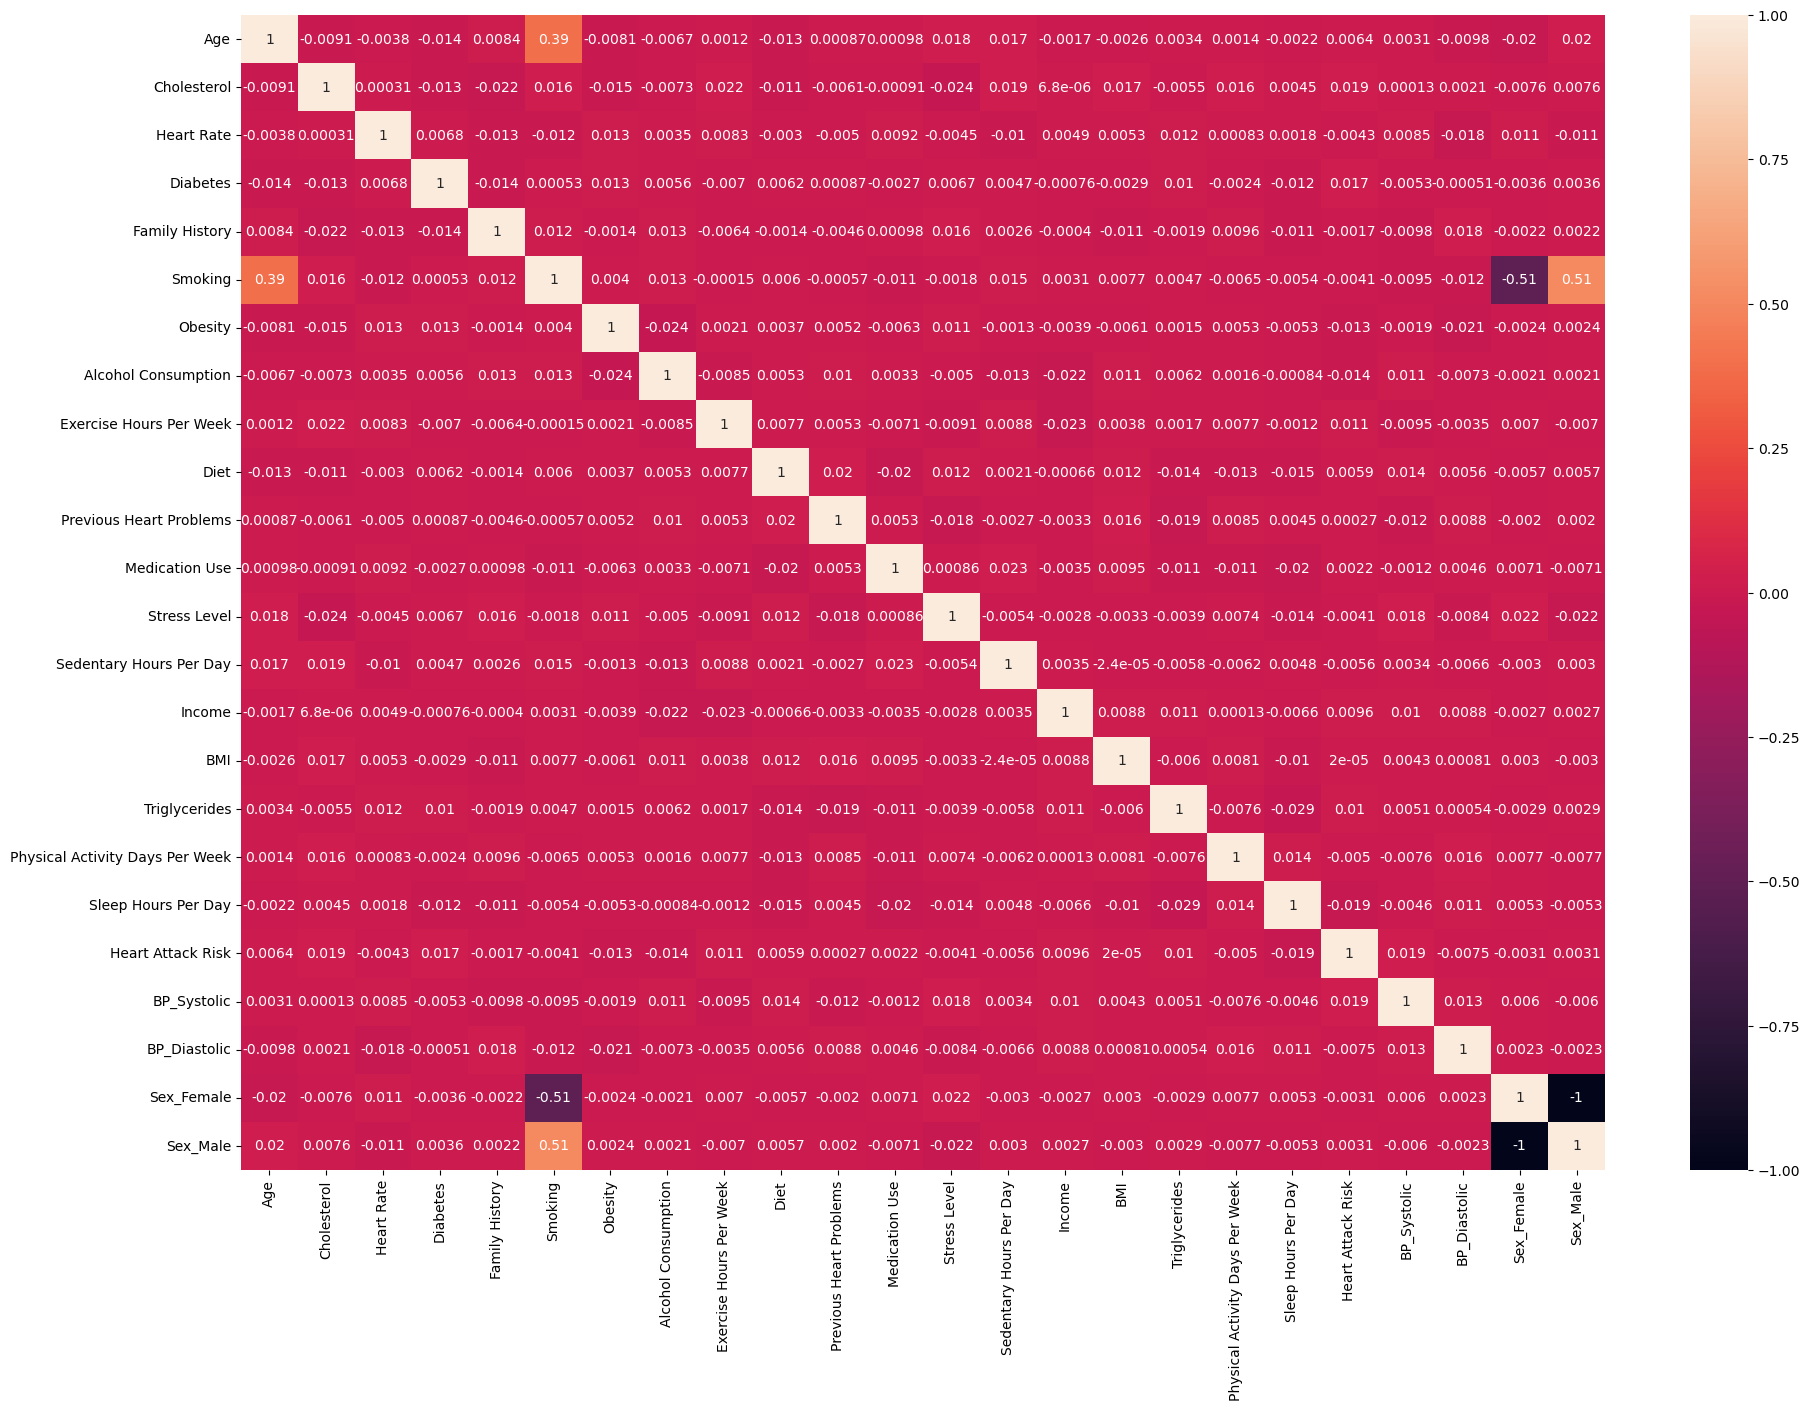

In [144]:
plt.figure(figsize=(22,15))
sns.heatmap(data.corr(),annot=True)      #annot= True means to include vaue.
plt.show()

**Plot** is **all set** for our **Model Building**

In [145]:
data

,Age,Cholesterol,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,Exercise Hours Per Week,Diet,Previous Heart Problems,Medication Use,Stress Level,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Heart Attack Risk,BP_Systolic,BP_Diastolic,Sex_Female,Sex_Male
0,67,208,72,0,0,1,0,0,4.168189,1,0,0,9,6.615001,261404,31.251233,286,0,6,0,158,88,0,1
1,21,389,98,1,1,1,1,1,1.813242,0,1,0,1,4.963459,285768,27.194973,235,1,7,0,165,93,0,1
2,21,324,72,1,0,0,0,0,2.078353,2,1,1,9,9.463426,235282,28.176571,587,4,4,0,174,99,1,0
3,84,383,73,1,1,1,0,1,9.828130,1,1,0,9,7.648981,125640,36.464704,378,3,4,0,163,100,0,1
4,66,318,93,1,1,1,1,0,5.804299,0,1,0,6,1.514821,160555,21.809144,231,1,5,0,91,88,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8758,60,121,61,1,1,1,0,1,7.917342,2,1,1,8,10.806373,235420,19.655895,67,7,7,0,94,76,0,1
8759,28,120,73,1,0,0,1,0,16.558426,2,0,0,8,3.833038,217881,23.993866,617,4,9,0,157,102,1,0
8760,47,250,105,0,1,1,1,1,3.148438,1,1,0,5,2.375214,36998,35.406146,527,4,4,1,161,75,0,1
8761,36,178,60,1,0,1,0,0,3.789950,0,1,1,5,0.029104,209943,27.294020,114,2,8,0,119,67,0,1


# MODEL BUILDING 🚀

In [330]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
df_train, df_test = train_test_split(data, train_size = 0.8, test_size = 0.2, random_state = 0)

In [331]:
df_train

,Age,Cholesterol,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,Exercise Hours Per Week,Diet,Previous Heart Problems,Medication Use,Stress Level,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Heart Attack Risk,BP_Systolic,BP_Diastolic,Sex_Female,Sex_Male
5286,54,262,105,1,0,1,0,0,13.695966,0,1,1,7,10.613113,63119,29.377505,41,1,4,0,167,62,0,1
1119,69,293,100,1,0,1,0,0,4.807782,1,0,0,5,4.437020,110811,23.915854,723,2,7,1,143,65,1,0
5315,53,297,74,1,1,1,1,1,13.043859,0,0,0,8,11.625867,106720,28.768280,202,2,7,0,158,84,0,1
3160,33,346,80,1,1,1,1,0,7.765712,1,1,0,10,7.719682,30794,19.647817,138,3,7,0,115,103,0,1
6791,83,386,91,1,1,1,0,0,18.694086,0,1,1,2,11.566200,251427,27.082343,747,7,7,0,90,70,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4373,36,228,92,0,0,1,0,1,2.430102,1,0,1,8,5.391507,110863,33.786195,453,2,6,1,150,93,0,1
7891,19,266,51,0,0,1,0,1,11.111076,0,1,0,7,1.357028,201463,18.896740,246,0,8,0,112,68,0,1
4859,67,254,107,1,0,1,0,0,2.678693,0,1,0,9,4.308290,71014,34.622069,48,6,10,0,175,90,0,1
3264,51,399,97,1,0,1,0,0,10.367228,2,0,0,4,3.846949,20643,28.989901,580,7,5,1,142,91,0,1


In [332]:
df_test

,Age,Cholesterol,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,Exercise Hours Per Week,Diet,Previous Heart Problems,Medication Use,Stress Level,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Heart Attack Risk,BP_Systolic,BP_Diastolic,Sex_Female,Sex_Male
6878,33,200,48,0,1,1,1,1,7.807690,0,0,1,2,0.138443,184066,30.449815,63,6,7,1,129,90,0,1
3784,56,262,46,1,0,1,0,0,17.297628,1,1,0,8,0.369552,211755,34.973685,333,7,8,1,159,105,1,0
1261,19,140,54,0,1,0,0,1,8.695288,1,1,1,3,8.646334,252203,30.554246,537,2,10,0,161,109,1,0
4761,50,163,53,0,1,1,1,1,10.161587,2,0,1,7,1.107884,121954,35.390265,591,0,9,1,120,62,1,0
7080,89,144,92,1,0,1,0,1,16.436787,2,1,0,1,1.337570,180121,39.575483,145,2,5,1,153,110,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7331,39,236,71,0,0,0,0,0,8.989457,1,0,0,5,11.734054,94044,32.033457,707,2,4,0,174,71,1,0
7428,35,356,67,0,0,0,0,0,0.996276,1,0,0,4,7.304056,189363,22.804168,312,5,5,0,139,106,1,0
5980,18,276,52,1,1,0,1,1,12.269336,2,1,0,3,9.984795,216178,20.512906,150,4,4,0,110,63,1,0
4731,61,166,68,1,0,1,0,1,8.888489,0,1,1,5,0.766859,247143,29.863857,663,2,8,1,127,65,0,1


In [333]:
X_train = df_train[['Age', 'Cholesterol', 'Heart Rate',
        'Diabetes', 'Family History', 'Smoking', 'Obesity',
        'Alcohol Consumption', 'Exercise Hours Per Week', 'Diet',
        'Previous Heart Problems', 'Medication Use', 'Stress Level',
        'Sedentary Hours Per Day', 'Income', 'BMI', 'Triglycerides',
        'Physical Activity Days Per Week', 'Sleep Hours Per Day',
         'BP_Systolic', 'BP_Diastolic','Sex_Female',
         'Sex_Male']]
y_train = df_train['Heart Attack Risk']

from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(random_state=1, max_depth=200)
tree.fit(X_train,y_train)


DecisionTreeClassifier(max_depth=200, random_state=1)

In [334]:
X_test=df_test[['Age', 'Cholesterol', 'Heart Rate',
        'Diabetes', 'Family History', 'Smoking', 'Obesity',
        'Alcohol Consumption', 'Exercise Hours Per Week', 'Diet',
        'Previous Heart Problems', 'Medication Use', 'Stress Level',
        'Sedentary Hours Per Day', 'Income', 'BMI', 'Triglycerides',
        'Physical Activity Days Per Week', 'Sleep Hours Per Day',
         'BP_Systolic', 'BP_Diastolic','Sex_Female',
         'Sex_Male']]
y_test=df_test[['Heart Attack Risk']]
y_test

,Heart Attack Risk
6878,1
3784,1
1261,0
4761,1
7080,1
...,...
7331,0
7428,0
5980,0
4731,1


In [335]:
# Checking length
total_len = (len(X_train))
print("All total length = ",total_len)    # total row
print("X_train length and Y_train length = ", len(X_train),len(y_train))   #total train dataset length
print("X_test length = ", len(X_test))  # total test dataset length

All total length =  7010
X_train length and Y_train length =  7010 7010
X_test length =  1753


In [336]:
predicted_risk=tree.predict(X_test)
predicted_risk

array([1, 0, 1, ..., 0, 0, 0], dtype=int64)

In [337]:
count=0
c=0
for i in range(0,1753):
    if predicted_risk[i]==1:
        count=count+1
    else:
        c=c+1
print(count,"   ", c)

627     1126


In [338]:


for i in range(len(X_test)):
    print("Predicted Risk:", predicted_risk[i], "     Actual Risk:", y_test.values[i][0])


Predicted Risk: 1      Actual Risk: 1
Predicted Risk: 0      Actual Risk: 1
Predicted Risk: 1      Actual Risk: 0
Predicted Risk: 0      Actual Risk: 1
Predicted Risk: 0      Actual Risk: 1
Predicted Risk: 0      Actual Risk: 1
Predicted Risk: 1      Actual Risk: 0
Predicted Risk: 0      Actual Risk: 1
Predicted Risk: 0      Actual Risk: 1
Predicted Risk: 0      Actual Risk: 0
Predicted Risk: 0      Actual Risk: 1
Predicted Risk: 0      Actual Risk: 0
Predicted Risk: 0      Actual Risk: 0
Predicted Risk: 0      Actual Risk: 0
Predicted Risk: 0      Actual Risk: 0
Predicted Risk: 0      Actual Risk: 0
Predicted Risk: 0      Actual Risk: 0
Predicted Risk: 0      Actual Risk: 0
Predicted Risk: 0      Actual Risk: 0
Predicted Risk: 1      Actual Risk: 1
Predicted Risk: 1      Actual Risk: 0
Predicted Risk: 1      Actual Risk: 1
Predicted Risk: 0      Actual Risk: 1
Predicted Risk: 0      Actual Risk: 0
Predicted Risk: 0      Actual Risk: 0
Predicted Risk: 0      Actual Risk: 0
Predicted Ri

In [343]:
from sklearn.metrics import accuracy_score

# Assuming Y_test is the actual labels
# and predicted_risk contains the predicted labels
accuracy = accuracy_score(y_test,predicted_risk)
print(f'Accuracy: {accuracy * 100:.2f}%')

Accuracy: 54.71%


In [344]:
from sklearn.metrics import classification_report

# Assuming Y_test is the actual labels
# and predicted_risk contains the predicted labels
report = classification_report(y_test, predicted_risk)

print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

           0       0.64      0.65      0.65      1114
           1       0.38      0.37      0.37       639

    accuracy                           0.55      1753
   macro avg       0.51      0.51      0.51      1753
weighted avg       0.55      0.55      0.55      1753



In [345]:
from sklearn.metrics import confusion_matrix,classification_report
cm = confusion_matrix(y_test,predicted_risk)
print(cm)

[[723 391]
 [403 236]]


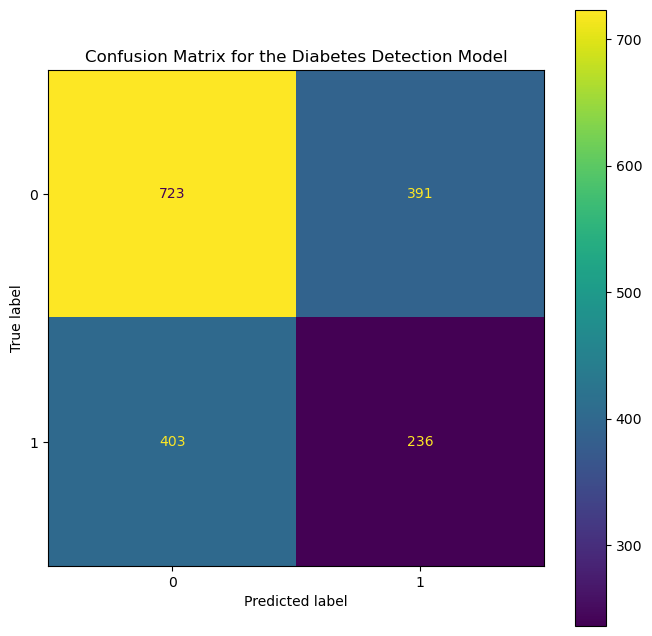

In [346]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
class_names =['0','1']
# Change figure size and increase dpi for better resolution
# and get reference to axes object
fig, ax = plt.subplots(figsize=(8,8), dpi=100)

# initialize using the raw 2D confusion matrix
# and output labels (in our case, it's 0 and 1)
display = ConfusionMatrixDisplay(cm, display_labels=class_names)

# set the plot title using the axes object
ax.set(title='Confusion Matrix for the Diabetes Detection Model')

# show the plot.
# Pass the parameter ax to show customizations (ex. title)
display.plot(ax=ax);